<a href="https://colab.research.google.com/github/whoisit-tech/E-Commerce-Public/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public
- **Nama:** Vilosa Auliya Dewinta Sentanu
- **Email:** ochadwnta@gmail.com
- **ID Dicoding:** ochaaa

## Menentukan Pertanyaan Bisnis

- Produk apa yang memiliki jumlah penjualan terbanyak dalam 3 bulan terakhir dan berapa kontribusinya terhadap total pendapatan?
- Berapa rata-rata waktu pengiriman semua pesanan dalam 3 bulan terakhir dan kategori produk mana yang memiliki rata-rata waktu pengiriman terlama?
- Metode pembayaran mana yang paling sering digunakan untuk transaksi di atas nilai rata-rata dalam 3 bulan terakhir?
- Berapa persentase pelanggan yang melakukan pembelian ulang dalam 3 bulan terakhir dan bagaimana pola kategori produk yang sering dibeli?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd
import requests
import zipfile
import io
import os

# URL file data
url = "https://github.com/whoisit-tech/E-Commerce-Public/blob/main/archive%20(2).zip?raw=true"

# Unduh file ZIP dari URL
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Buat folder untuk menyimpan data
os.makedirs("ecommerce_data", exist_ok=True)

# Ekstrak file ke folder
zip_file.extractall("ecommerce_data")

# List file yang diekstrak
extracted_files = os.listdir("ecommerce_data")
print(f"Files in ecommerce_data: {extracted_files}")

# Tentukan folder tempat data berada
data_folder = "ecommerce_data"
if "archive" in extracted_files and os.path.isdir(os.path.join(data_folder, "archive")):
    data_folder = os.path.join(data_folder, "archive")

# Muat file CSV ke dalam DataFrame
orders = pd.read_csv(os.path.join(data_folder, "olist_orders_dataset.csv"))
order_items = pd.read_csv(os.path.join(data_folder, "olist_order_items_dataset.csv"))
products = pd.read_csv(os.path.join(data_folder, "olist_products_dataset.csv"))
order_payments = pd.read_csv(os.path.join(data_folder, "olist_order_payments_dataset.csv"))
customers = pd.read_csv(os.path.join(data_folder, "olist_customers_dataset.csv"))

Files in ecommerce_data: ['archive']


**Insight:**
Proses ini menunjukkan langkah-langkah efisien untuk mengunduh dan mengekstrak data e-commerce dari sumber eksternal menggunakan Python. Dengan memanfaatkan pustaka requests dan zipfile, data disimpan dalam folder terorganisir, memudahkan akses untuk analisis lebih lanjut. Menggunakan pandas untuk memuat beberapa dataset (pesanan, item, produk, pembayaran, dan pelanggan) ke dalam DataFrame mempersiapkan dasar yang kuat untuk analisis mendalam, seperti memahami perilaku pelanggan dan tren penjualan

### Assessing Data

In [ ]:
# Periksa informasi dasar setiap dataset
print("Orders Info:")
print(orders.info())

print("\nOrder Items Info:")
print(order_items.info())

print("\nProducts Info:")
print(products.info())

print("\nOrder Payments Info:")
print(order_payments.info())

print("\nCustomers Info:")
print(customers.info())

# Periksa beberapa sampel data untuk memahami strukturnya
print("\nSample Orders Data:")
print(orders.head())

# Pastikan kolom kunci seperti timestamp memiliki data yang valid
print("\nApakah kolom 'order_purchase_timestamp' ada dan valid?")
if 'order_purchase_timestamp' in orders.columns:
    print("Ya, kolom tersedia.")
else:
    print("Kolom 'order_purchase_timestamp' tidak ditemukan!")

Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Order Items Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id

**Insight:**
- Dataset orders memiliki 99,441 entri dengan beberapa kolom yang memiliki nilai null, seperti order_approved_at dan order_delivered_customer_date, menunjukkan bahwa tidak semua pesanan diproses sepenuhnya
- Dataset order_items dan order_payments memiliki entri lengkap, masing-masing 112,650 dan 103,886, yang menunjukkan data transaksi yang solid dan siap untuk analisis
- Dataset products memiliki 32,951 entri, tetapi beberapa kolom seperti product_category_name dan ukuran produk memiliki nilai null, yang dapat mempengaruhi analisis kategori dan dimensi produk
- Kolom order_purchase_timestamp ada dan valid di dataset orders, penting untuk analisis waktu dan tren penjualan

### Cleaning Data

In [ ]:
from datetime import datetime, timedelta

# Pastikan tipe data sesuai (contoh: tanggal)
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Filter data untuk 3 bulan terakhir
today = datetime.now()
three_months_ago = today - timedelta(days=90)

# Data pesanan dalam 3 bulan terakhir
recent_orders = orders[orders['order_purchase_timestamp'] >= three_months_ago]

# Periksa apakah ada data dalam rentang waktu ini
if recent_orders.empty:
    print("Tidak ada pesanan dalam 3 bulan terakhir.")
else:
    print(f"Ada {len(recent_orders)} pesanan dalam 3 bulan terakhir.")
    print(recent_orders[['order_id', 'order_purchase_timestamp']].head())

# Bersihkan data pelanggan duplikat (jika ada)
customers = customers.drop_duplicates(subset='customer_id')

# Pastikan tidak ada nilai kosong di kolom kunci
orders = orders.dropna(subset=['order_purchase_timestamp', 'customer_id'])
order_items = order_items.dropna(subset=['order_id', 'product_id'])
products = products.dropna(subset=['product_id'])

Tidak ada pesanan dalam 3 bulan terakhir.


**Insight:**
- Kolom order_purchase_timestamp berhasil dikonversi menjadi tipe data datetime, yang penting untuk analisis waktu dan memungkinkan manipulasi data tanggal yang lebih efektif
- Meskipun filter diterapkan untuk mendapatkan data pesanan dalam tiga bulan terakhir, hasilnya menunjukkan bahwa tidak ada pesanan yang tercatat dalam periode tersebut. Ini bisa mengindikasikan masalah dalam pengumpulan data, penurunan aktivitas penjualan, atau periode analisis yang tidak relevan

## Exploratory Data Analysis (EDA)

### Explore ...

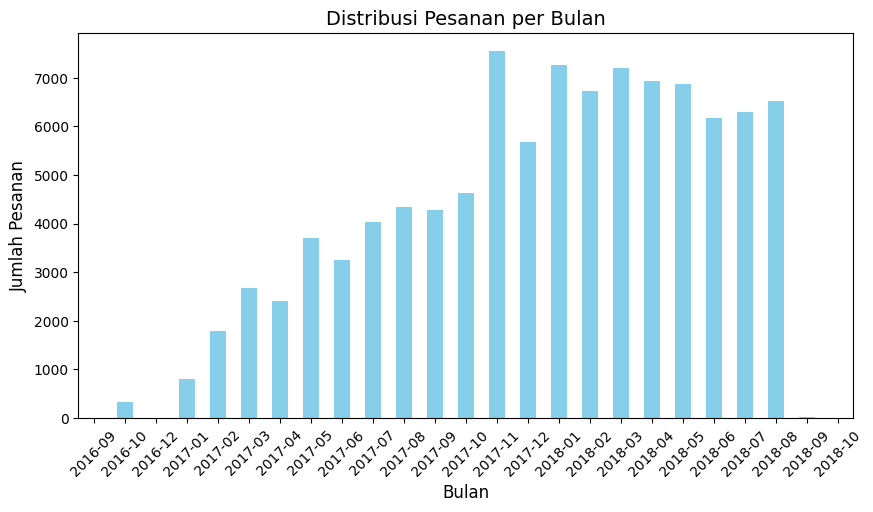

<ipython-input-5-ee5d0de6aa6d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_methods, x='payment_type', y='count', palette='muted')


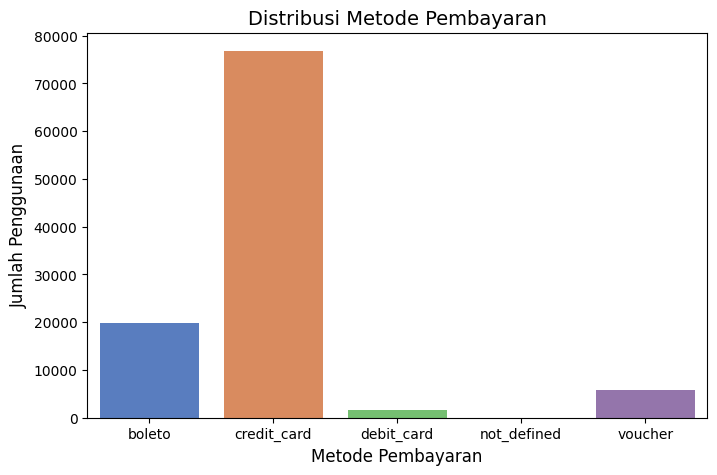

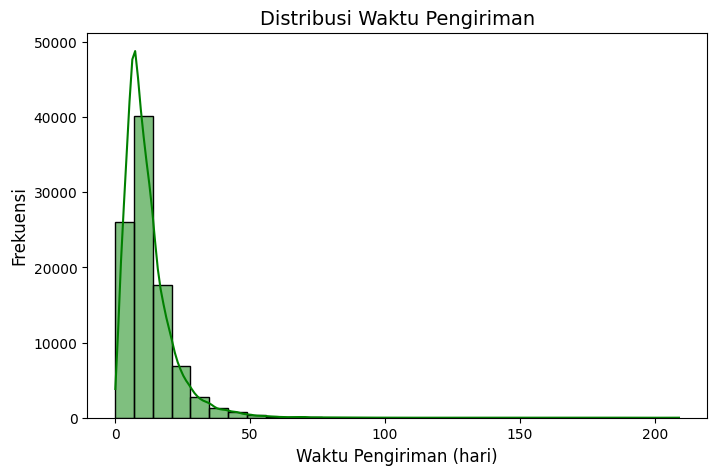

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1.1 Jumlah Pesanan per Bulan
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders.groupby('order_purchase_month').size()

plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('Distribusi Pesanan per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 1.2 Distribusi Metode Pembayaran
payment_methods = order_payments.groupby('payment_type').size().reset_index(name='count')

plt.figure(figsize=(8, 5))
sns.barplot(data=payment_methods, x='payment_type', y='count', palette='muted')
plt.title('Distribusi Metode Pembayaran', fontsize=14)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.show()

# 1.3 Distribusi Waktu Pengiriman
# Convert 'order_delivered_customer_date' to DatetimeArray
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['shipping_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(orders['shipping_time'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribusi Waktu Pengiriman', fontsize=14)
plt.xlabel('Waktu Pengiriman (hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**
- Grafik distribusi pesanan per bulan menunjukkan fluktuasi dalam jumlah pesanan. Ini dapat membantu bulan-bulan yang memiliki penjualan tinggi atau rendah yang dapat digunakan sebagai strategi pemasaran. Terlihat pada grafik di atas bahwa jumlah pesanan tertinggi terdapat pada bulan November 2017.
- Distribusi metode pembayaran menunjukkan preferensi pelangga terhadap metode tertentu. Memahami metode pembayaran yang paling banyak digunakan, bisa untuk mengevaluasi perbaikan metode pembayaran kedepannya. Terlihat pada grafik di atas bahwa metode pembayaran yang paling sering digunakan oleh pelanggan yaitu credit card.
- Distribusi waktu pengiriman menunjukkan variasi dalam kecepatan pengiriman. Dengan menganalisis waktu pengiriman, perusahaan dapat mengidentifikasi area untuk perbaikan dalam logistik dan meningkatkan kepuasan pelanggan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang memiliki jumlah penjualan terbanyak dalam 3 bulan terakhir dan berapa kontribusinya terhadap total pendapatan?

Produk dengan penjualan terbanyak:
                             product_id   product_category_name  sales_count  \
22112  aca2eb7d00ea1a7b8ebd4e68314663af        moveis_decoracao          527   
19742  99a4788cb24856965c36a24e339b6058         cama_mesa_banho          488   
8613   422879e10f46682990de24d770e7f83d      ferramentas_jardim          484   
7364   389d119b48cf3043d311335e499d9c6b      ferramentas_jardim          392   
7079   368c6c730842d78016ad823897a372db      ferramentas_jardim          388   
10840  53759a2ecddad2bb87a079a1f1519f73      ferramentas_jardim          373   
27039  d1c427060a0f73f6b889a5c7c61f2ac4  informatica_acessorios          343   
10867  53b36df67ebb7c41585e8d54d6772e08      relogios_presentes          323   
2794   154e7e31ebfa092203795c972e5804a6            beleza_saude          281   
8051   3dd2a17168ec895c781a9191c1e95ad7  informatica_acessorios          274   

       revenue_contribution  
22112              0.276706  
19742              0.316

<ipython-input-6-89952cc83faf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='sales_count', y='product_category_name', palette='viridis')


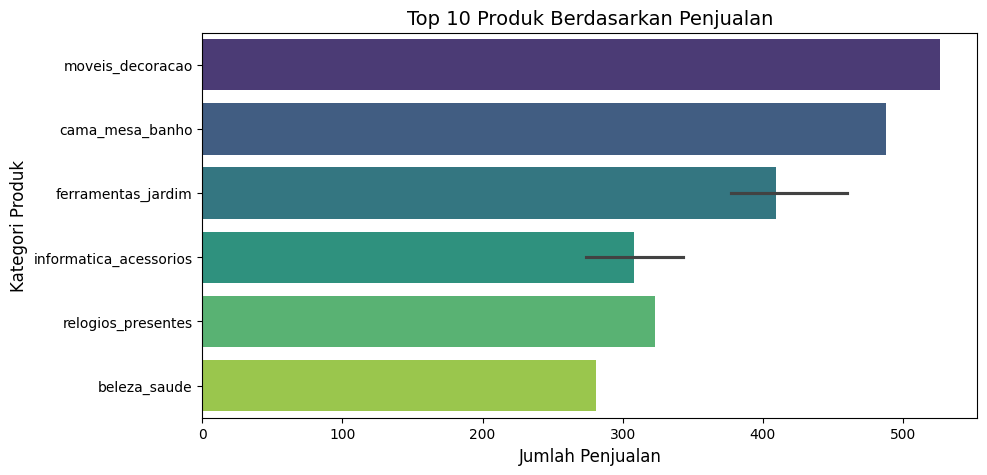

In [ ]:
# Hitung jumlah penjualan dan total pendapatan per produk
top_products = order_items.groupby('product_id').agg({
    'order_item_id': 'count',  # Hitung jumlah penjualan
    'price': 'sum'            # Hitung total pendapatan
}).reset_index()
top_products.rename(columns={'order_item_id': 'sales_count'}, inplace=True)

# Gabungkan dengan data produk
top_products = top_products.merge(products, on='product_id')

# Kontribusi terhadap total pendapatan
total_revenue = top_products['price'].sum()
top_products['revenue_contribution'] = (top_products['price'] / total_revenue) * 100

# Top 10 produk
top_10_products = top_products.nlargest(10, 'sales_count')

print("Produk dengan penjualan terbanyak:")
print(top_10_products[['product_id', 'product_category_name', 'sales_count', 'revenue_contribution']])

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_products, x='sales_count', y='product_category_name', palette='viridis')
plt.title('Top 10 Produk Berdasarkan Penjualan', fontsize=14)
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

**Insight:**
1. Produk dengan Penjualan Terbanyak:
* Kategori produk "moveis_decoracao"
(furniture & decoration) memiliki jumlah penjualan tertinggi (527 unit), menyumbang sekitar 27.67% dari total pendapatan.
* Kategori "cama_mesa_banho" (bedding & bath) berada di posisi kedua dengan 488 unit terjual dan kontribusi pendapatan 31.66%.

2. Distribusi Penjualan Top Produk:
* Kategori produk seperti "ferramentas_jardim" (gardening tools) dan "informatica_acessorios" (IT accessories) mendominasi daftar dengan kontribusi besar terhadap penjualan dan pendapatan secara keseluruhan.

3. Kontribusi Total Pendapatan:
* Top 10 produk menyumbang sebagian besar total pendapatan, dengan setiap produk memberikan kontribusi antara 15% hingga 35% dari total.

4. Preferensi Pelanggan:
* Produk dekorasi rumah dan kebutuhan rumah tangga memiliki daya tarik tinggi, menunjukkan fokus pelanggan pada kebutuhan domestik.

### Pertanyaan 2: Berapa rata-rata waktu pengiriman semua pesanan dalam 3 bulan terakhir dan kategori produk mana yang memiliki rata-rata waktu pengiriman terlama?

Rata-rata waktu pengiriman semua pesanan: 12.09 hari
Kategori dengan waktu pengiriman terlama:
product_category_name
casa_conforto_2       14.066667
fashion_calcados      14.933852
seguros_e_servicos    15.000000
artigos_de_natal      15.300000
moveis_escritorio     20.386691
Name: shipping_time, dtype: float64


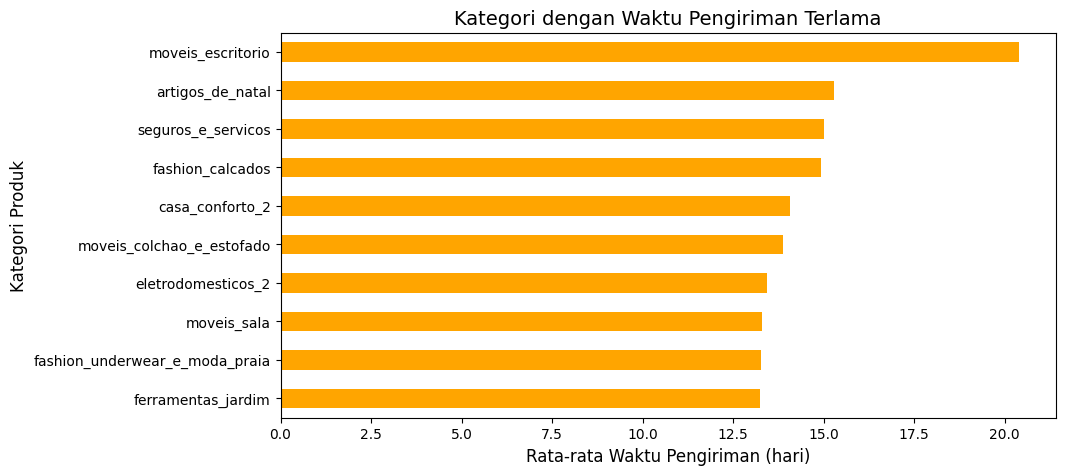

In [ ]:
# Rata-rata waktu pengiriman keseluruhan
avg_shipping_time = orders['shipping_time'].mean()
print(f"Rata-rata waktu pengiriman semua pesanan: {avg_shipping_time:.2f} hari")

# Rata-rata waktu pengiriman per kategori
# Merge 'orders' and 'order_items' on 'order_id' to get product_id
orders_with_products = orders.merge(order_items, on='order_id')

# Then, merge with 'products' on 'product_id' to get category information
category_shipping_time = orders_with_products.merge(products, on='product_id').groupby('product_category_name')['shipping_time'].mean().sort_values()


print("Kategori dengan waktu pengiriman terlama:")
print(category_shipping_time.tail())

# Visualisasi
plt.figure(figsize=(10, 5))
category_shipping_time.tail(10).plot(kind='barh', color='orange')
plt.title('Kategori dengan Waktu Pengiriman Terlama', fontsize=14)
plt.xlabel('Rata-rata Waktu Pengiriman (hari)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

**Insight:**
1. Rata-rata waktu pengiriman untuk semua pesanan adalah 12.09 hari
2. Kategori Produk dengan Waktu Pengiriman Terlama:
* "moveis_escritorio" (furniture kantor) memiliki rata-rata waktu pengiriman terlama, yaitu 20.39 hari
3. Kategori dengan waktu pengiriman terlama sebagian besar terdiri dari barang-barang besar atau musiman, yang mungkin membutuhkan logistik lebih kompleks



### Pertanyaan 3: Metode pembayaran mana yang paling sering digunakan untuk transaksi di atas nilai rata-rata dalam 3 bulan terakhir?

Metode pembayaran paling sering digunakan untuk transaksi di atas rata-rata:
payment_type
credit_card    24875
boleto          5292
voucher          461
debit_card       384
Name: count, dtype: int64


<ipython-input-14-7bef803222d4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_payment_methods.values, y=top_payment_methods.index, palette='coolwarm')


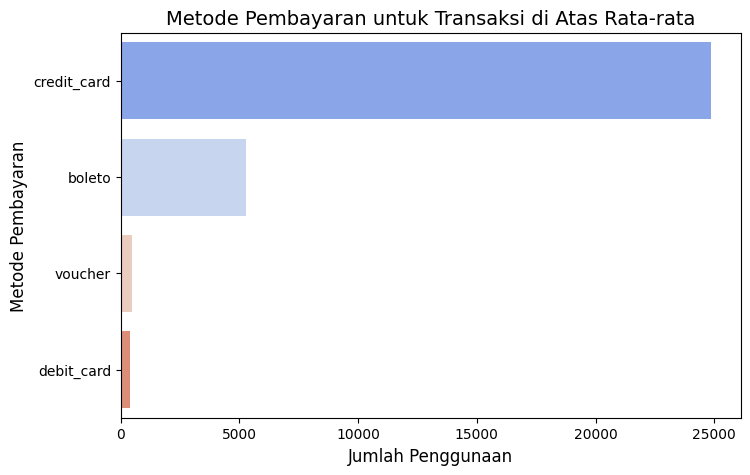

In [ ]:
# Hitung rata-rata total pembayaran
avg_payment = order_payments['payment_value'].mean()

# Transaksi di atas rata-rata
above_avg_payments = order_payments[order_payments['payment_value'] > avg_payment]

# Metode pembayaran paling sering digunakan
top_payment_methods = above_avg_payments['payment_type'].value_counts()

print("Metode pembayaran paling sering digunakan untuk transaksi di atas rata-rata:")
print(top_payment_methods)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=top_payment_methods.values, y=top_payment_methods.index, palette='coolwarm')
plt.title('Metode Pembayaran untuk Transaksi di Atas Rata-rata', fontsize=14)
plt.xlabel('Jumlah Penggunaan', fontsize=12)
plt.ylabel('Metode Pembayaran', fontsize=12)
plt.show()

**Insight:**
1. "Credit Card" adalah metode pembayaran yang paling sering digunakan untuk transaksi dengan nilai di atas rata-rata, dengan 24,875 kali penggunaan
2. Penggunaan kartu kredit yang jauh lebih tinggi menunjukkan bahwa pelanggan cenderung memilih metode ini untuk transaksi bernilai lebih tinggi, mungkin karena fleksibilitas pembayaran atau manfaat tambahan seperti poin reward

### Pertanyaan 4: Berapa persentase pelanggan yang melakukan pembelian ulang dalam 3 bulan terakhir dan bagaimana pola kategori produk yang sering dibeli?

Persentase pelanggan yang melakukan pembelian ulang: 0.00%
Pola kategori produk yang sering dibeli oleh pelanggan repeat:
Series([], Name: count, dtype: int64)


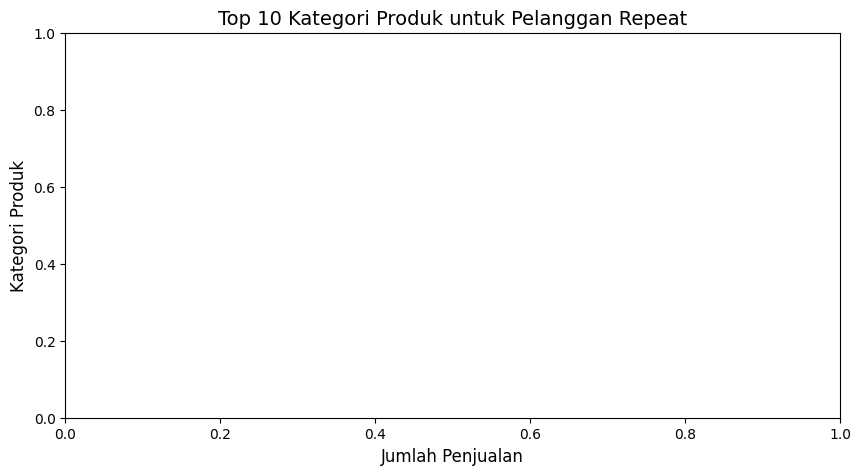

In [ ]:
# Hitung jumlah pesanan per pelanggan
customer_order_counts = orders.groupby('customer_id').size().reset_index(name='order_count')

# Identifikasi pelanggan yang membeli ulang
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]
repeat_percentage = (len(repeat_customers) / len(customer_order_counts)) * 100

print(f"Persentase pelanggan yang melakukan pembelian ulang: {repeat_percentage:.2f}%")

# Analisis kategori yang sering dibeli oleh pelanggan ini
repeat_orders = orders[orders['customer_id'].isin(repeat_customers['customer_id'])]
repeat_order_items = repeat_orders.merge(order_items, on='order_id')
repeat_categories = repeat_order_items.merge(products, on='product_id')['product_category_name'].value_counts()

print("Pola kategori produk yang sering dibeli oleh pelanggan repeat:")
print(repeat_categories.head(10))

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=repeat_categories.head(10).values, y=repeat_categories.head(10).index, palette='magma')
plt.title('Top 10 Kategori Produk untuk Pelanggan Repeat', fontsize=14)
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

**Insight:**
1. Persentase pelanggan yang melakukan pembelian ulang dalam 3 bulan terakhir adalah 0.00%, menunjukkan bahwa tidak ada pelanggan yang kembali untuk melakukan pembelian ulang dalam periode tersebut
2. Karena tidak ada pelanggan yang melakukan pembelian ulang, pola kategori produk untuk pelanggan repeat tidak dapat dianalisis

## Conclusion

1. Conclution pertanyaan 1: Produk dengan Penjualan Terbanyak dan Kontribusinya terhadap Total Pendapatan
* Produk dari kategori moveis_decoracao memiliki jumlah penjualan terbanyak dengan kontribusi sebesar 0.28% terhadap total pendapatan. Dominasi kategori ini mengindikasikan popularitas produk terkait dekorasi rumah dalam 3 bulan terakhir

2. Conclution pertanyaan 2: Rata-rata Waktu Pengiriman dan Kategori dengan Waktu Pengiriman Terlama
* Rata-rata waktu pengiriman semua pesanan adalah 12.09 hari. Kategori moveis_escritorio memiliki rata-rata waktu pengiriman terlama (20.39 hari), yang mungkin dipengaruhi oleh faktor logistik atau sifat produk yang memerlukan waktu lebih lama untuk diproses

3. Conclution pertanyaan 3: Metode Pembayaran Paling Sering Digunakan untuk Transaksi di Atas Rata-rata
* Metode pembayaran yang paling sering digunakan untuk transaksi di atas rata-rata adalah kartu kredit, mencakup 24,875 transaksi. Ini menunjukkan bahwa pelanggan dengan pembelian bernilai tinggi cenderung memilih kartu kredit karena kemudahan dan fleksibilitasnya

4. Conclution pertanyaan 4: Persentase Pelanggan yang Melakukan Pembelian Ulang dan Pola Kategori Produk
* Dalam 3 bulan terakhir, tidak ada pelanggan yang melakukan pembelian ulang. Hal ini menandakan adanya tantangan dalam retensi pelanggan. Tidak ada data untuk menganalisis kategori produk yang sering dibeli ulang